<a href="https://colab.research.google.com/github/zl3214/Course-Notes-DeepLearning-DataScience/blob/main/5245assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a)**

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [7]:
# load dataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=0)


100%|██████████| 9912422/9912422 [00:00<00:00, 33133574.63it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 72754170.46it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37544740.60it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13415865.33it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



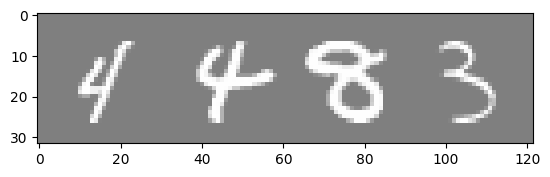

In [9]:
import numpy as np


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))


**b)**

In [10]:

flattened_images = images.view(images.shape[0], -1)  # The '-1' will automatically calculate the size for that dimension (28*28 = 784)
print("Shape of flattened images:", flattened_images.shape)


Shape of flattened images: torch.Size([4, 784])


**c)**

In [11]:
input_neurons = 784
hidden_neurons = 128
output_neurons = 10

W1 = torch.zeros(input_neurons, hidden_neurons, requires_grad=True)
b1 = torch.zeros(hidden_neurons, requires_grad=True)

W2 = torch.zeros(hidden_neurons, output_neurons, requires_grad=True)
b2 = torch.zeros(output_neurons, requires_grad=True)

print("Shape of W1:", W1.shape)
print("Shape of b1:", b1.shape)
print("Shape of W2:", W2.shape)
print("Shape of b2:", b2.shape)


Shape of W1: torch.Size([784, 128])
Shape of b1: torch.Size([128])
Shape of W2: torch.Size([128, 10])
Shape of b2: torch.Size([10])


In [12]:
def relu(x):
    return torch.maximum(torch.zeros_like(x), x)

def forward_pass(x):
    h1 = relu(torch.mm(x, W1) + b1)  # h1 = ReLU(XW1 + b1)
    y = torch.mm(h1, W2) + b2  # Y = h1W2 + b2
    return y

output = forward_pass(flattened_images)
print("Output shape:", output.shape)


Output shape: torch.Size([4, 10])


**d)**

In [13]:
def relu(x):
    return torch.maximum(torch.zeros_like(x), x)

def predict(X):
    h1 = relu(torch.mm(X, W1) + b1)

    Y = torch.mm(h1, W2) + b2

    return Y

random_input = torch.rand((1, 784))
predicted_output = predict(random_input)

print("Shape of predicted output:", predicted_output.shape)
print("Predicted output:", predicted_output)


Shape of predicted output: torch.Size([1, 10])
Predicted output: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], grad_fn=<AddBackward0>)


**e)**

In [14]:
from torch import optim
import torch.nn as nn

optimizer = optim.SGD([W1, b1, W2, b2], lr=0.001)
criterion = nn.CrossEntropyLoss()


In [15]:
num_steps = 1000

for step in range(num_steps):
    images, labels = next(iter(trainloader))

    flattened_images = images.view(images.shape[0], -1)

    optimizer.zero_grad()

    outputs = predict(flattened_images)

    loss = criterion(outputs, labels)

    loss.backward()

    optimizer.step()

    if (step + 1) % 100 == 0:
        print(f"Step [{step + 1}/{num_steps}], Loss: {loss.item():.4f}")


Step [100/1000], Loss: 2.3034
Step [200/1000], Loss: 2.3031
Step [300/1000], Loss: 2.3034
Step [400/1000], Loss: 2.3019
Step [500/1000], Loss: 2.3015
Step [600/1000], Loss: 2.2997
Step [700/1000], Loss: 2.3022
Step [800/1000], Loss: 2.3062
Step [900/1000], Loss: 2.2986
Step [1000/1000], Loss: 2.3065


**f)**

In [16]:
loss_values = []

for step in range(num_steps):
    images, labels = next(iter(trainloader))
    flattened_images = images.view(images.shape[0], -1)
    optimizer.zero_grad()
    outputs = predict(flattened_images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    if (step + 1) % 100 == 0:
        print(f"Step [{step + 1}/{num_steps}], Loss: {loss.item():.4f}")


Step [100/1000], Loss: 2.2930
Step [200/1000], Loss: 2.3034
Step [300/1000], Loss: 2.3068
Step [400/1000], Loss: 2.2951
Step [500/1000], Loss: 2.3003
Step [600/1000], Loss: 2.3020
Step [700/1000], Loss: 2.2990
Step [800/1000], Loss: 2.2932
Step [900/1000], Loss: 2.2986
Step [1000/1000], Loss: 2.2930


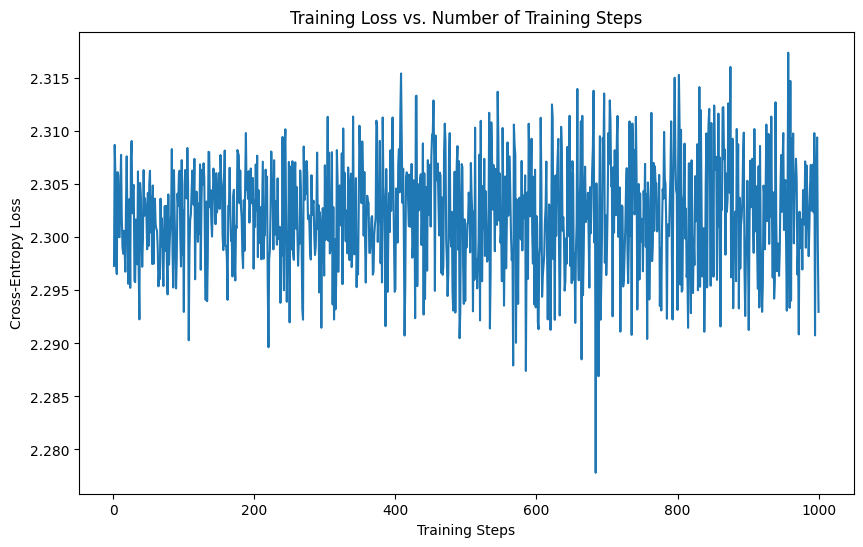

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_steps + 1), loss_values)
plt.xlabel('Training Steps')
plt.ylabel('Cross-Entropy Loss')
plt.title('Training Loss vs. Number of Training Steps')
plt.show()


The train loss do not significantly increase or decrease as the steps increase.

**g)**

In [18]:
W1 = torch.zeros(input_neurons, hidden_neurons, requires_grad=True)
b1 = torch.zeros(hidden_neurons, requires_grad=True)
W2 = torch.zeros(hidden_neurons, output_neurons, requires_grad=True)
b2 = torch.zeros(output_neurons, requires_grad=True)

adam_optimizer = optim.Adam([W1, b1, W2, b2], lr=0.001)


In [19]:
adam_loss_values = []

for step in range(num_steps):
    images, labels = next(iter(trainloader))
    flattened_images = images.view(images.shape[0], -1)
    adam_optimizer.zero_grad()
    outputs = predict(flattened_images)
    loss = criterion(outputs, labels)
    loss.backward()
    adam_optimizer.step()

    adam_loss_values.append(loss.item())

    if (step + 1) % 100 == 0:
        print(f"Step [{step + 1}/{num_steps}], Loss with Adam: {loss.item():.4f}")


Step [100/1000], Loss with Adam: 2.2989
Step [200/1000], Loss with Adam: 2.3061
Step [300/1000], Loss with Adam: 2.3254
Step [400/1000], Loss with Adam: 2.2984
Step [500/1000], Loss with Adam: 2.2927
Step [600/1000], Loss with Adam: 2.3199
Step [700/1000], Loss with Adam: 2.3120
Step [800/1000], Loss with Adam: 2.3017
Step [900/1000], Loss with Adam: 2.3127
Step [1000/1000], Loss with Adam: 2.2788


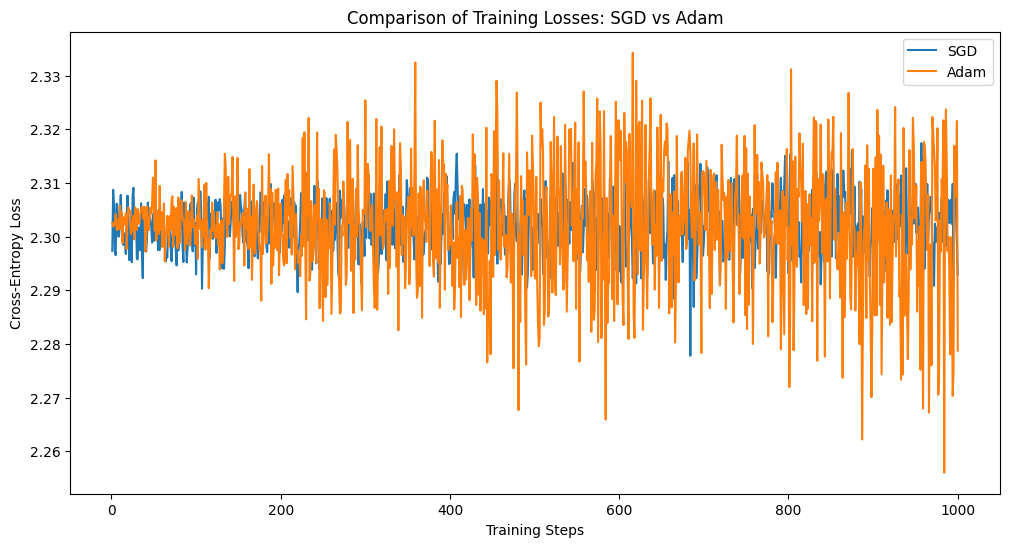

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_steps + 1), loss_values, label='SGD')
plt.plot(range(1, num_steps + 1), adam_loss_values, label='Adam')
plt.xlabel('Training Steps')
plt.ylabel('Cross-Entropy Loss')
plt.title('Comparison of Training Losses: SGD vs Adam')
plt.legend()
plt.show()


**h)**

In [27]:
W1 = torch.randn(input_neurons, hidden_neurons).detach() * 0.1
W1.requires_grad_()
b1 = torch.randn(hidden_neurons).detach() * 0.1
b1.requires_grad_()
W2 = torch.randn(hidden_neurons, output_neurons).detach() * 0.1
W2.requires_grad_()
b2 = torch.randn(output_neurons).detach() * 0.1
b2.requires_grad_()

adam_optimizer = optim.Adam([W1, b1, W2, b2], lr=0.001)


In [28]:
random_init_loss_values = []

for step in range(num_steps):
    images, labels = next(iter(trainloader))
    flattened_images = images.view(images.shape[0], -1)
    adam_optimizer.zero_grad()
    outputs = predict(flattened_images)
    loss = criterion(outputs, labels)
    loss.backward()
    adam_optimizer.step()

    random_init_loss_values.append(loss.item())

    if (step + 1) % 100 == 0:
        print(f"Step [{step + 1}/{num_steps}], Loss with Random Initialization: {loss.item():.4f}")


Step [100/1000], Loss with Random Initialization: 0.8388
Step [200/1000], Loss with Random Initialization: 0.8842
Step [300/1000], Loss with Random Initialization: 1.4727
Step [400/1000], Loss with Random Initialization: 1.4951
Step [500/1000], Loss with Random Initialization: 2.5076
Step [600/1000], Loss with Random Initialization: 0.5126
Step [700/1000], Loss with Random Initialization: 0.7149
Step [800/1000], Loss with Random Initialization: 0.0501
Step [900/1000], Loss with Random Initialization: 0.4580
Step [1000/1000], Loss with Random Initialization: 0.1952


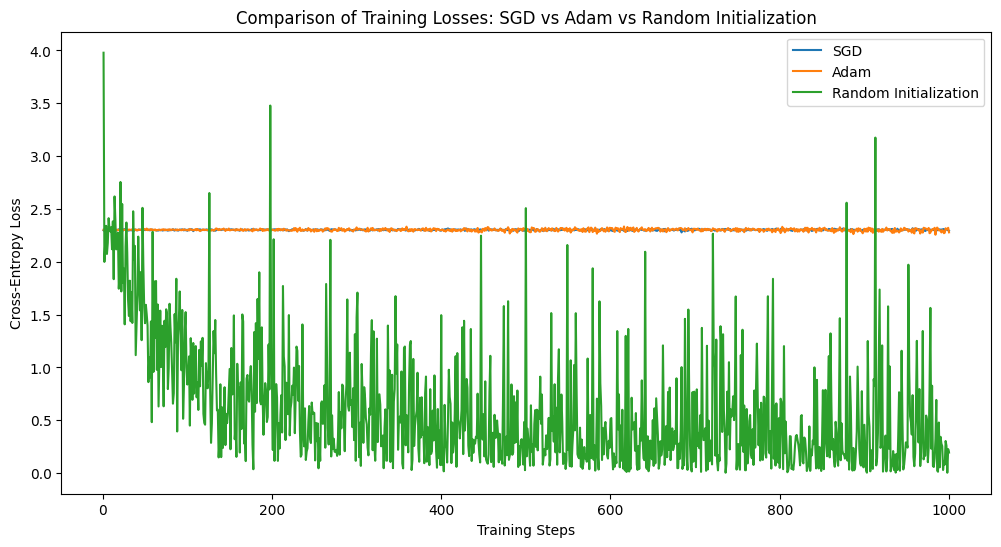

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, num_steps + 1), loss_values, label='SGD')
plt.plot(range(1, num_steps + 1), adam_loss_values, label='Adam')
plt.plot(range(1, num_steps + 1), random_init_loss_values, label='Random Initialization')
plt.xlabel('Training Steps')
plt.ylabel('Cross-Entropy Loss')
plt.title('Comparison of Training Losses: SGD vs Adam vs Random Initialization')
plt.legend()
plt.show()


The loss of Adam with random initialization converges to 0 faster than other two.

In [31]:
!jupyter nbconvert --to html *.ipynb


[NbConvertApp] WARNING | pattern '*.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute t

In [34]:
!rm -rf *.ipynb
!rm -rf *.html
from google.colab import files
uploaded = files.upload()



Saving Untitled0.ipynb to Untitled0.ipynb


In [35]:
!jupyter nbconvert --to html *.ipynb


[NbConvertApp] Converting notebook Untitled0.ipynb to html
[NbConvertApp] Writing 1058569 bytes to Untitled0.html


In [39]:
# Assuming filename contains the name of your notebook
filename = 'Untitled0.ipynb'  # Replace this with the actual filename if different
files.download(filename[:-5] + 'html')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>